# Week 1 Tutorial from "A first course in Network Science"

You can use NetworkX to construct and draw graphs that are undirected or directed, with weighted or unweighted edges. An array of functions to analyze graphs is available. This tutorial takes you through a few basic examples and exercises.

Note that many exercises are followed by a block with some `assert` statements. These assertions may be preceded by some setup code. They are provided to give you feedback that you are on the right path -- receiving an `AssertionError` probably means you've done something wrong.

## Official documentation for version used in this tutorial

https://networkx.github.io/documentation/networkx-2.2/

## Official tutorial for version used in this tutorial

https://networkx.github.io/documentation/networkx-2.2/tutorial.html

# The `import` statement

Recall that `import` statements go at the top of your code, telling Python to load an external module. In this case we want to load NetworkX, but give it a short alias `nx` since we'll have to type it repeatedly, hence the `as` statement.

Lines starting with the `%` character are not Python code, they are "magic" directives for Jupyter notebook. The `%matplotlib inline` magic tells Jupyter Notebook to draw graphics inline i.e. in the notebook. This magic should be used right after the import statement.

In [1]:
# complex networks package - guide https://networkx.org/ 
import networkx as nx

# visualization packages - https://matplotlib.org/ 
import matplotlib.pyplot as plt
%matplotlib inline
from networkx.drawing.nx_agraph import graphviz_layout

# n-dinsional array tool - https://numpy.org/ 
import numpy as np

In [2]:
nx.__version__

'2.8.6'

Let's check the installed version of NetworkX. Version 2 is incompatible with v1, so we want to make sure we're not using an out of date package.

# Creating and drawing undirected graphs

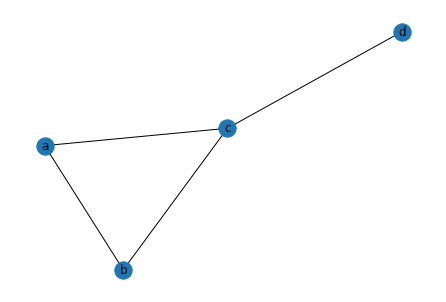

In [3]:
# a "plain" graph is undirected
G = nx.Graph()

# give each a node a 'name', which is a letter in this case.
G.add_node('a')

# the add_nodes_from method allows adding nodes from a sequence, in this case a list
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# add edge from 'a' to 'b'
# since this graph is undirected, the order doesn't matter here
G.add_edge('a', 'b')

# just like add_nodes_from, we can add edges from a sequence
# edges should be specified as 2-tuples
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# draw the graph
nx.draw(G, with_labels=True)

There are many optional arguments to the draw function to customize the appearance.

In [4]:
nx.draw_networkx

<function networkx.drawing.nx_pylab.draw_networkx(G, pos=None, arrows=None, with_labels=True, **kwds)>

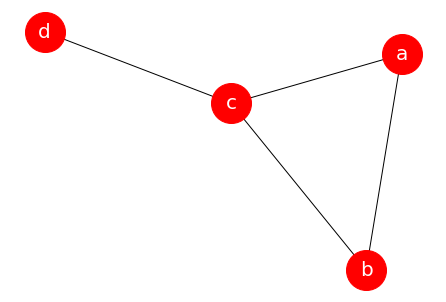

In [5]:
nx.draw(G,
        with_labels=True,
        node_color='red',
        node_size=1600,
        font_color='white',
        font_size=20,
        )
# you can save the figure as follows
plt.savefig("test_graph.png")

# A note on naming conventions

Usually in Python, variables are named in `snake_case`, i.e. lowercase with underscores separating words. Classes are conventionally named in `CamelCase`, i.e. with the first letter of each word capitalized.

Obviously NetworkX doesn't use this convention, often using single capital letters for the names of graphs. This is an example of convention leaking from the world of discrete mathematics. Since most of the documentation you will find online uses this convention, we will follow it as well.

# Graph methods for undirected graphs

The graph object has some properties and methods giving data about the whole graph.

In [6]:
# List all of the nodes
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [7]:
# List all of the edges
G.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

NodeView and EdgeView objects have iterators, so we can use them in `for` loops:

In [8]:
for node in G.nodes:
    print(node)

a
b
c
d


In [9]:
for edge in G.edges:
    print(edge)

('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')


Note that the edges are given as 2-tuples, the same way we entered them.

We can get the number of nodes and edges in a graph using the `number_of_` methods.

In [10]:
G.number_of_nodes()

4

In [11]:
G.number_of_edges()

4

Some graph methods take an edge or node as argument. These provide the graph properties of the given edge or node. For example, the `.neighbors()` method gives the nodes linked to the given node:

In [12]:
# list of neighbors of node 'b'
G.neighbors('b')

For performance reasons, many graph methods return iterators instead of lists. They are convenient to loop over:

In [13]:
for neighbor in G.neighbors('b'):
    print(neighbor)

a
c


and you can always use the `list` constructor to make a list from an iterator:

In [14]:
list(G.neighbors('b'))

['a', 'c']

# NetworkX functions vs. Graph methods

The previous data are available via graph *methods*, *i.e.* they are called from the graph object:

    G.<method_name>(<arguments>)

While several of the most-used NetworkX functions are provided as methods, many more of them are module functions and are called like this:

    nx.<function_name>(G, <arguments>)

that is, with the graph provided as the first, and maybe only, argument. Here are a couple of examples of NetworkX module functions that provide information about a graph:

In [15]:
nx.is_tree(G)

False

In [16]:
nx.is_connected(G)

True

# Node and edge existence

To check if a node is present in a graph, you can use the `has_node()` method:

In [17]:
G.has_node('a')

True

In [18]:
G.has_node('x')

False

Additionally, the loop syntax used above: `for n in G.nodes` suggests another way we can check if a node is in a graph:

In [19]:
'd' in G.nodes

True

Likewise we can check if two nodes are connected by an edge:

In [20]:
G.has_edge('a', 'b')

True

In [21]:
G.has_edge('a', 'd')

False

In [22]:
('c', 'd') in G.edges

True

# Node degree

One of the most important questions we can ask about a node in a graph is how many other nodes it connects to. Using the `.neighbors()` method from above, we could formulate this question as so:

In [23]:
len(list(G.neighbors('a')))

2

but this is such a common task that NetworkX provides us a graph method to do this in a much clearer way:

In [24]:
G.degree('a')

2

In [25]:
dens=(nx.number_of_edges(G)*2)/((nx.number_of_nodes(G)-1)*nx.number_of_nodes(G))
print(dens)

nx.density(G)

0.6666666666666666


0.6666666666666666

# Aside: comprehensions

Often we have one sequence of values and we want to generate a new sequence by applying an operation to each item in the first. List comprehensions and generator expressions are compact ways to do this.

List comprehensions are specified inside square brackets, and immediately produce a list of the result.

In [26]:
items = ['spider', 'fly', 'mosquito']
[item.upper() for item in items] # item.upper changes the case of the label

['SPIDER', 'FLY', 'MOSQUITO']

In the context of NetworkX, this is often used to do something with the node or edge lists:

In [27]:
print(G.nodes())
print([G.degree(n) for n in G.nodes()])

['a', 'b', 'c', 'd']
[2, 2, 3, 1]


Generator expressions are slightly different as they are evaluated [lazily](https://en.wikipedia.org/wiki/Lazy_evaluation). These are specified using round braces, and if they are being expressed as a function argument, they can be specified without any braces. These are most often used in the context of aggregations like the `max` function:

In [28]:
g = (len(item) for item in items) # len(item) provides the number of characters of the label
list(g)

[6, 3, 8]

In [29]:
max(len(item) for item in items)

8

In [30]:
sorted(item for item in items) #sorts in alphabetic order the labels

['fly', 'mosquito', 'spider']

# Node names

The node names don't have to be single characters -- they can be strings or integers or any immutable object, and the types can be mixed. The example below uses strings and integers for names.

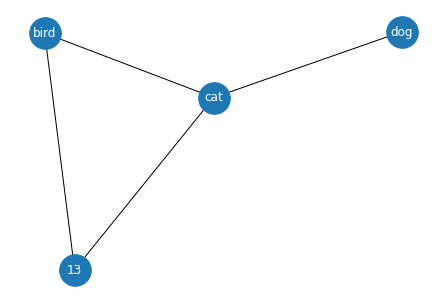

In [31]:
G = nx.Graph()

G.add_nodes_from(['cat','dog','bird',13])

G.add_edges_from([('cat','dog'),('cat',13),('bird','cat'),('bird',13)])

nx.draw(G, with_labels=True, font_color='white', node_size=1000)

# Adjacency lists

One compact way to represent a graph is an adjacency list. This is most useful for unweighted graphs, directed or undirected. In an adjacency list, each line contains some number of node names. The first node name is the "source" and each other node name on the line is a "target". For instance, given the following adjacency list:
```
a d e
b c
c
d
e
```
the edges are as follows:
```
(a, d)
(a, e)
(b, c)
```
The nodes on their own line exist so that we are sure to include any singleton nodes. Note that if our graph is undirected, we only need to specify one direction for each edge. Importantly, whether the graph is directed or undirected is often not contained in the file itself -- you have to infer it. This is one limitation of the format.

In the `datasets` directory, there is a file called `friends.adjlist`. It's a plain text file, so you can open it on your computer or in GitHub, but here are its contents:

In [32]:
print(open('friends.adjlist').read())

George Frank Dennis
Dennis Claire Esther
Claire Frank Alice Esther
Bob Alice
Frank Alice
Alice
Esther
Shelly



NetworkX provides a way to read a graph from an adjacency list: `nx.read_adjlist()`. We will name this graph SG, for social graph.

In [33]:
SG = nx.read_adjlist('friends.adjlist')
print(SG.nodes)
print(SG.edges)

['George', 'Frank', 'Dennis', 'Claire', 'Esther', 'Alice', 'Bob', 'Shelly']
[('George', 'Frank'), ('George', 'Dennis'), ('Frank', 'Claire'), ('Frank', 'Alice'), ('Dennis', 'Claire'), ('Dennis', 'Esther'), ('Claire', 'Alice'), ('Claire', 'Esther'), ('Alice', 'Bob')]


We know how to draw this graph:

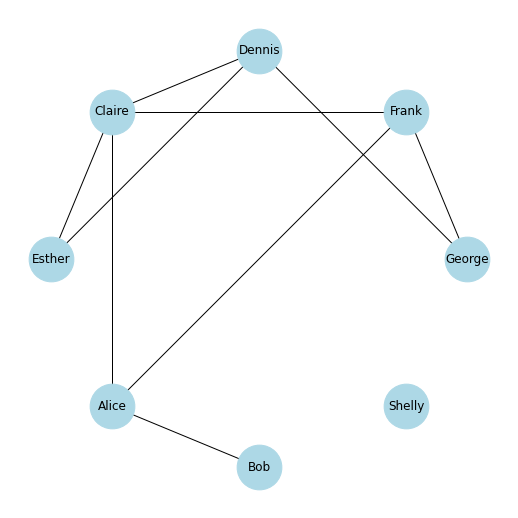

In [34]:
plt.figure(figsize=(7, 7))
nx.draw_circular(SG, node_size=2000, node_color='lightblue', with_labels=True)
plt.savefig("graph_ex.png")

And we know how to get information such as the number of friends linked from a node:

In [35]:
print(SG.degree('Alice'))
list(SG.neighbors('Alice'))

3


['Claire', 'Bob', 'Frank']

# Adding graph attributes: edge-weights, node class

With NetworkX an attribute is implemented as a dictionary associated with the edge or the node. 

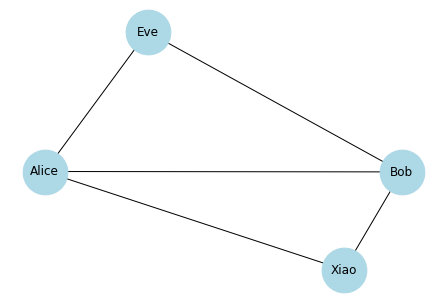

In [36]:
# Define attribute at the time the graph is defined
SG2=nx.Graph()
SG2.add_nodes_from([('Alice', {'female': True,'caucasian': True}),('Bob',{'female': False,'caucasian': False}), ('Xiao',{'female': False,'caucasian':False}),('Eve', {'female': True,'caucasian': True})])
SG2.add_weighted_edges_from([('Alice','Bob',0.9),('Alice','Eve',0.1),('Eve','Bob',0.1),('Xiao','Bob',0.3),('Xiao','Alice',0.2)])

nx.draw(SG2,node_size=2000, node_color='lightblue',with_labels=True)

In [37]:
# changing individual edge attributes (weights):
SG2.edges['Alice','Bob']['weight']=0.8
print(nx.get_edge_attributes(SG2,'weight'))


# changing individual nodes attributes (nodes):
SG2.nodes['Bob']['caucasian']= True
print(nx.get_node_attributes(SG2,'female'))
print(nx.get_node_attributes(SG2,'caucasian'))

{('Alice', 'Bob'): 0.8, ('Alice', 'Eve'): 0.1, ('Alice', 'Xiao'): 0.2, ('Bob', 'Eve'): 0.1, ('Bob', 'Xiao'): 0.3}
{'Alice': True, 'Bob': False, 'Xiao': False, 'Eve': True}
{'Alice': True, 'Bob': True, 'Xiao': False, 'Eve': True}


In [38]:
siblings=set(('Bob','Alice'))
siblings_dict={node: (node in siblings) for node in SG2}
#print(siblings_dict)
nx.set_node_attributes(SG2,siblings_dict,'sibling')
print(nx.get_node_attributes(SG2,'sibling'))

{'Alice': True, 'Bob': True, 'Xiao': False, 'Eve': False}


# Visualization 

There are different possible layouts for graphs. Here we show how to use a few example and also how to use labels to color nodes differently

['pink', 'lightblue', 'lightblue', 'pink']


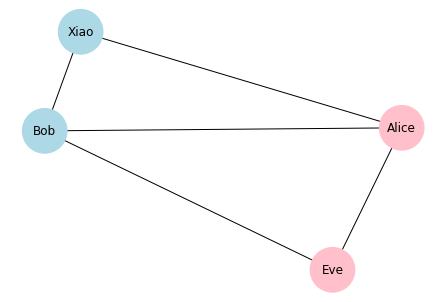

In [39]:
# change color depending on an attribute

gender_colors=['pink' if n[1]['female'] else 'lightblue' for n in SG2.nodes(data=True)]
print(gender_colors)

nx.draw(SG2,node_size=2000, node_color=gender_colors,with_labels=True)

It is also possible to use different layouts:

Layout            | Arrangement     | Layout Function                         |
----------------- | --------------- | --------------------------------------- |
*Random*          | randomly        | pos =`nx.random_layout()`               |
*Circular*        | on a cycle      | pos =`nx.circular_layout()`             |
*Spectral*        | using centrality| pos =`nx.spectral_layout()`             |
*Force directed*  | balls repulsion | pos =`nx.fruhterman_reingold_layout()`  |


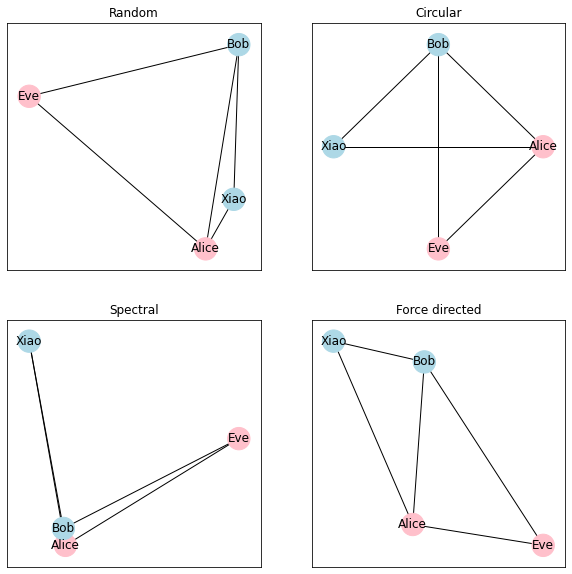

In [40]:
# Draw four layouts in four subplots

_, plot = plt.subplots(2,2,figsize=(10,10))
subplots = plot.reshape(1,4)[0]
layouts = (nx.random_layout, nx.circular_layout,nx.spectral_layout,nx.fruchterman_reingold_layout)
titles =('Random','Circular','Spectral','Force directed')

for plot, layout, title in zip(subplots,layouts,titles):
    pos=layout(SG2)
    nx.draw_networkx(SG2,pos=pos,ax=plot,with_labels=True,node_size=500, node_color=gender_colors)
    plot.set_title(title)

## Visualization of weights

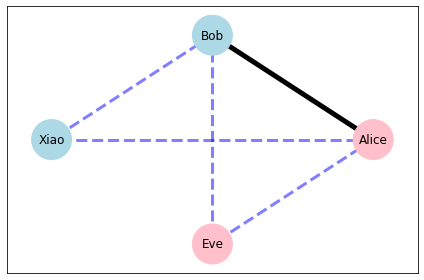

In [41]:
# We want to visualize the weights in the graph SG2

elarge = [(u, v) for (u, v, d) in SG2.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in SG2.edges(data=True) if d["weight"] <= 0.5]

pos = nx.circular_layout(SG2)  # positions for all nodes - seed for reproducibility

# we first draw the nodes only
nx.draw_networkx_nodes(SG2, pos, node_size=1600,node_color=gender_colors)

# then we draw the edges
nx.draw_networkx_edges(SG2, pos, edgelist=elarge, width=5)
nx.draw_networkx_edges(SG2, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed")

# labels
nx.draw_networkx_labels(SG2, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis('on')
plt.tight_layout()
plt.show()


________________________________
# Directed graphs

Unless otherwise specified, we assume graph edges are undirected -- they are symmetric and go both ways. But some relationships, e.g. predator-prey relationships, are asymmetric and best represented as directed graphs. NetworkX provides the `DiGraph` class for directed graphs.

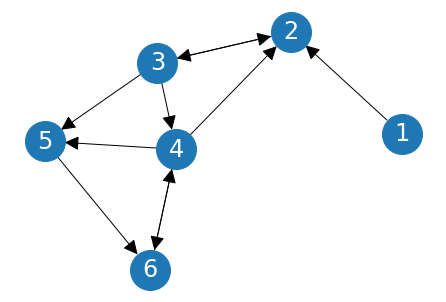

In [42]:
D = nx.DiGraph()

D.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)])

nx.draw(D, with_labels=True,font_color='white',font_size=24, node_size=1600, arrowsize=30)

Note the asymmetry in graph methods dealing with edges such as `has_edge()`:

In [43]:
D.has_edge(1,2)

True

In [44]:
D.has_edge(2,1)

False

Instead of the symmetric relationship "neighbors", nodes in directed graphs have predecessors ("in-neighbors") and successors ("out-neighbors"):

In [45]:
print('Successors of 2:', list(D.successors(2)))

print('Predecessors of 2:', list(D.predecessors(2)))

Successors of 2: [3]
Predecessors of 2: [1, 3, 4]


Directed graphs have in-degree and out-degree, giving the number of edges pointing to and from the given node, respectively:

In [46]:
D.in_degree(2)

3

In [47]:
D.out_degree(2)

1

### Caveat

Since NetworkX 2, the `.degree()` method on a directed graph gives the total degree: in-degree plus out-degree. However, in a bit of confusing nomenclature, the `neighbors` method is a synonym for `successors`, giving only the edges originating from the given node. This makes sense if you consider `neighbors` to be all the nodes reachable from the given node by following links, but it's easy to make the mistake of writing `.neighbors()` in your code when you really want both predecessors and successors.

In [48]:
D.degree(2)

4

In [49]:
print('Successors of 2:', list(D.successors(2)))
print('"Neighbors" of 2:', list(D.neighbors(2)))

Successors of 2: [3]
"Neighbors" of 2: [3]


In [50]:
# Directed to undirected graph

H=D.to_undirected()
print(H.edges)

[(1, 2), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6)]


## Line Graph

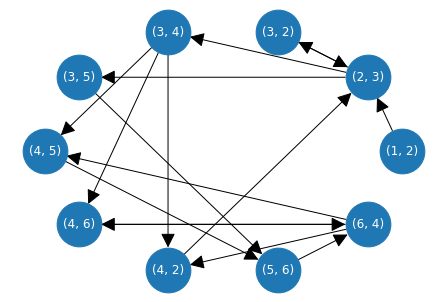

In [51]:
L = nx.line_graph(D) # this is the line graph of the previously defined directed graph D

nx.draw_circular(L,with_labels=True,font_color='white',node_size=2000,arrowsize=30)

_________________________________
# Multigraphs

[1, 2, 3, 4, 5, 6]
[(1, 5, 1), (1, 4, 1), (2, 4, 1), (2, 4, 2), (2, 6, 1), (2, 6, 2), (2, 5, 2), (3, 5, 2), (3, 6, 1)]
All edges with key 2: [(2, 4), (2, 6), (2, 5), (3, 5)]


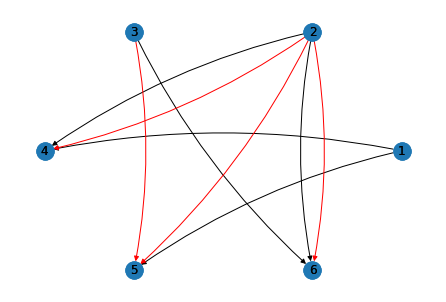

In [52]:
MG=nx.MultiDiGraph()
MG.add_nodes_from(range(1,6))
medges=[(2,4,1),(2, 4, 2),(2,6,1),(2,6,1),(2,6,2),(2,5,2),(1,5,1),(1,4,1),(3,5,2),(3,6,1)]
MG.add_edges_from(medges)
print(MG.nodes)
print(MG.edges)
MGedgelist1=[(i, j)   for i, j, k in MG.edges if k == 1]
MGedgelist2=[(i, j)   for i, j, k in MG.edges if k == 2]
print("All edges with key 2:",[(i, j)   for i, j, k in MG.edges if k == 2])

pos=nx.circular_layout(MG)

nx.draw(MG, pos, with_labels=True, arrows = True, edgelist=MGedgelist1, connectionstyle='arc3, rad = 0.1')
nx.draw(MG, pos, with_labels=True, arrows = True, edgelist=MGedgelist2, edge_color='red', 
    connectionstyle='arc3, rad = -0.1')


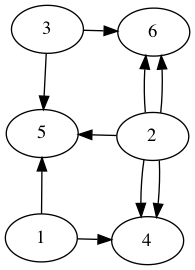

In [53]:
import networkx as nx
from IPython.display import Image
# G=nx.MultiGraph()
# G.add_edge(1,2)
# G.add_edge(1,2)
nx.drawing.nx_agraph.write_dot(MG,'multi.dot')
!neato -T png multi.dot > multi.png
Image("multi.png")

_______________________________________________________________________
# Special Graphs

NetworkX has a number of functions that define special types of graphs that are defined in https://networkx.org/documentation/stable/reference/generators.html 
All the examples made below are deterministic graphs. We will discuss random graphs and random networks later. 

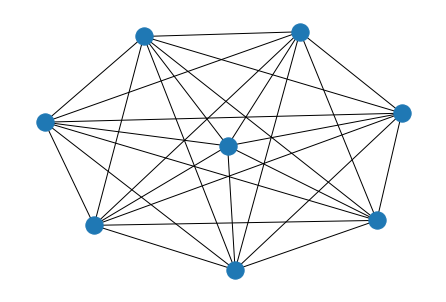

In [54]:
C = nx.complete_graph(8)
nx.draw(C)

{0, 1, 2, 3}
{4, 5, 6, 7, 8, 9, 10}


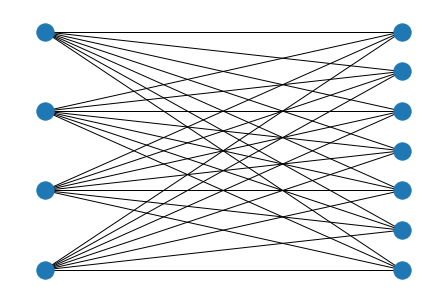

In [55]:
B = nx.complete_bipartite_graph(4,7)
bottom_nodes, top_nodes = nx.bipartite.sets(B)
print(bottom_nodes)
print(top_nodes)

nx.draw(B, nx.bipartite_layout(B, bottom_nodes, align='vertical', scale=1, center=None, aspect_ratio=1.3333333333333333))

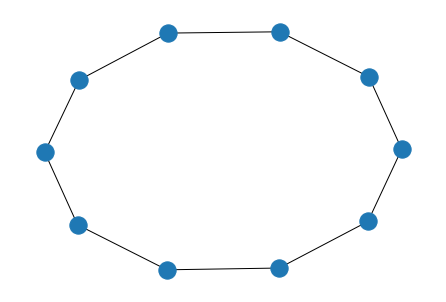

In [56]:
Cy = nx.cycle_graph(10)
nx.draw(Cy)

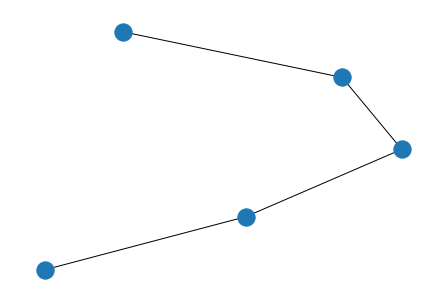

In [57]:
P = nx.path_graph(5)
nx.draw(P)

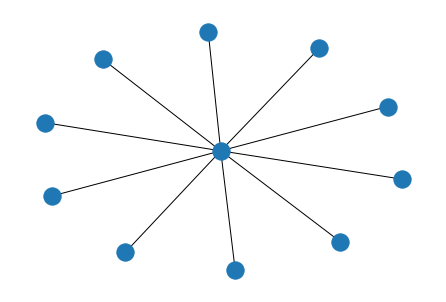

In [58]:
S = nx.star_graph(10)
nx.draw(S)

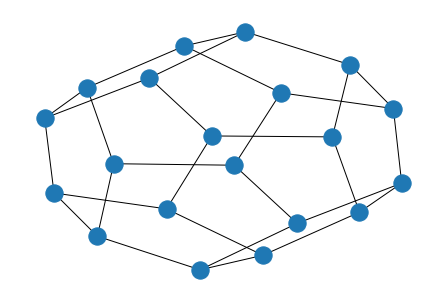

In [59]:
Do = nx.dodecahedral_graph()
nx.draw(Do)

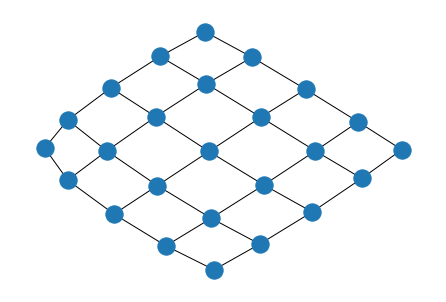

In [60]:
Gr = nx.grid_2d_graph(5, 5)
nx.draw(Gr)

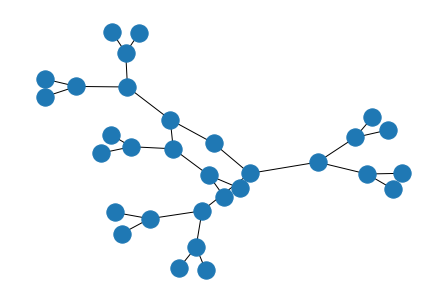

In [61]:
T = nx.balanced_tree(2, 4)
nx.draw(T)

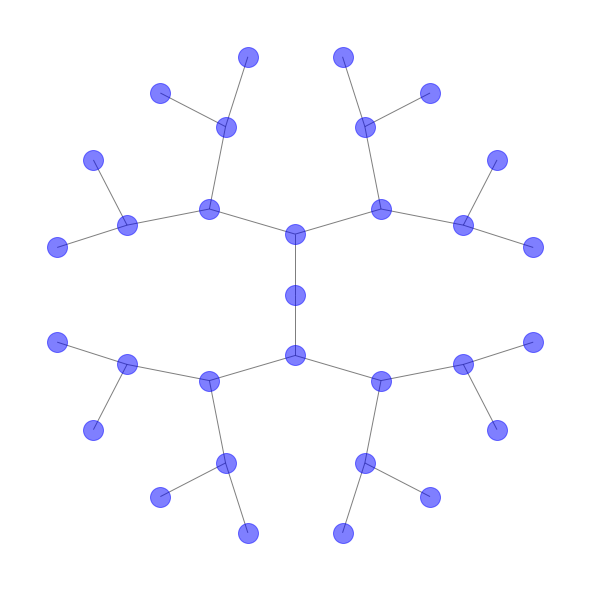

In [62]:
# This is better to visualize the tree and uses graphviz, which is a better package to visualize graphs

import pygraphviz 
import matplotlib.pyplot as plt
pos = nx.nx_agraph.graphviz_layout(T, prog="twopi", args="")
plt.figure(figsize=(8, 8))
nx.draw(T, pos, node_size=400, alpha=0.5, node_color='blue', with_labels=False)
plt.axis("equal")
plt.show()

_____________________________________________________
# Matrix Network representation - unweighted

Next we generate the various matrices we defined in the first lecture. More at https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.incidence_matrix.html

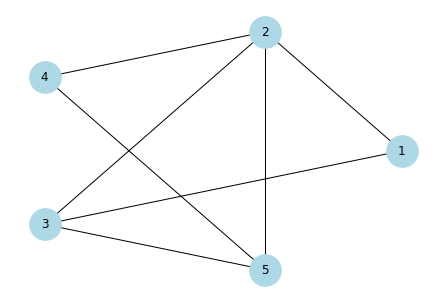

In [63]:
# an undirected graph

G.clear() # empties the graph but keeps the shell
G.add_edges_from([(1,2),(2,4),(2,3),(4,5),(5,3),(2,5),(1,3)])
nx.draw_circular(G,node_size=1000, node_color='lightblue',with_labels=True)

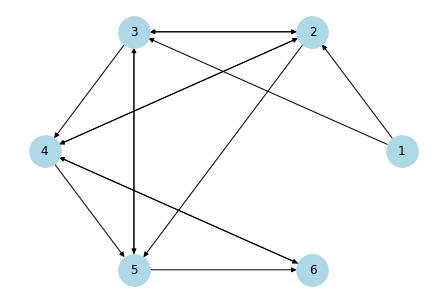

In [64]:
# an directed graph

D.clear
D.add_edges_from([(1,2),(2,4),(2,3),(4,5),(5,3),(2,5),(1,3)])
nx.draw_circular(D,node_size=1000, node_color='lightblue',with_labels=True)

## Adjacency matrix

### Undirected graph

In [65]:
Adj_G=nx.adjacency_matrix(G)
print(np.shape(Adj_G))
print(Adj_G.todense())

(5, 5)
[[0 1 0 1 0]
 [1 0 1 1 1]
 [0 1 0 0 1]
 [1 1 0 0 1]
 [0 1 1 1 0]]


### Directed graph

In [66]:
Adj_D=nx.adjacency_matrix(D)
print(np.shape(Adj_D))
print(Adj_D.todense())

(6, 6)
[[0 1 1 0 0 0]
 [0 0 1 1 1 0]
 [0 1 0 1 1 0]
 [0 1 0 0 1 1]
 [0 0 1 0 0 1]
 [0 0 0 1 0 0]]


## Incidence matrix

### Directed Graph

### Undirected Graph

In [67]:
Inc_D=nx.incidence_matrix(D, oriented=True)
print(np.shape(Inc_D))
print(Inc_D.todense())

(6, 14)
[[-1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. -1. -1. -1.  1.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  1.  0.  0. -1. -1. -1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  0. -1. -1. -1.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0. -1. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0. -1.]]


In [68]:
# Unoriented incidence matrix
Inc_G=nx.incidence_matrix(G, oriented = False)
print(np.shape(Inc_G))
print(Inc_G.todense())

# Oriented incidence matrix for undirected graph

Inc_Go=nx.incidence_matrix(G, oriented = True)
print(np.shape(Inc_Go))
print(Inc_Go.todense())

(5, 7)
[[1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 1.]]
(5, 7)
[[-1. -1.  0.  0.  0.  0.  0.]
 [ 1.  0. -1. -1. -1.  0.  0.]
 [ 0.  0.  1.  0.  0. -1.  0.]
 [ 0.  1.  0.  1.  0.  0. -1.]
 [ 0.  0.  0.  0.  1.  1.  1.]]


## Laplacian matrix

### Undirected graph

In [69]:
Lap_G=nx.laplacian_matrix(G)
print(np.shape(Lap_G))
print(Lap_G.todense())

# Laplacian matrix computed through the incidence matrix

Lap_GG=Inc_Go @ Inc_Go.T
print(Lap_GG.todense())

(5, 5)
[[ 2 -1  0 -1  0]
 [-1  4 -1 -1 -1]
 [ 0 -1  2  0 -1]
 [-1 -1  0  3 -1]
 [ 0 -1 -1 -1  3]]
[[ 2. -1.  0. -1.  0.]
 [-1.  4. -1. -1. -1.]
 [ 0. -1.  2.  0. -1.]
 [-1. -1.  0.  3. -1.]
 [ 0. -1. -1. -1.  3.]]


### Directed Graph

In [70]:
# Lap_D=nx.laplacian_matrix(D) # This generate an error. 

# Matrix Representation weighted

We need to replace the weights values instead of having 1. The same function can be used on the graph that is weighted, i.e. a graph G where we used G.add_weighted_edges_from([(node1,node2,weight)] to add edges

In [71]:
# getting the graph weights into a vector
w_dict=nx.get_edge_attributes(SG2,'weight')
w = np.array(list(w_dict.values()))
print('w is =',w)

w is = [0.8 0.1 0.2 0.1 0.3]


In [72]:
# adjacency matrix
Adj_SG2=nx.adjacency_matrix(SG2)
print('A is =') 
print(Adj_SG2.todense())

# laplacian matrix
Lap_SG2=nx.laplacian_matrix(SG2)
print('L is =') 
print(Lap_SG2.todense())

A is =
[[0.  0.8 0.2 0.1]
 [0.8 0.  0.3 0.1]
 [0.2 0.3 0.  0. ]
 [0.1 0.1 0.  0. ]]
L is =
[[ 1.1 -0.8 -0.2 -0.1]
 [-0.8  1.2 -0.3 -0.1]
 [-0.2 -0.3  0.5  0. ]
 [-0.1 -0.1  0.   0.2]]


In [73]:
Inc_SG2=nx.incidence_matrix(SG2,oriented = True) # this is an unweighted incidence matrix


# use the method B*diag(w)
w_dict=nx.get_edge_attributes(SG2,'weight')
w = np.array(list(w_dict.values()))
#print(w)
Diag_w=np.diag(w, k=0)
Inc_SG2=Inc_SG2*Diag_w
print('B is =') 
print(Inc_SG2)

B is =
[[-0.8 -0.1 -0.2  0.   0. ]
 [ 0.8  0.   0.  -0.1 -0.3]
 [ 0.   0.   0.2  0.   0.3]
 [ 0.   0.1  0.   0.1  0. ]]


### The following code can be handy to represent graphs in LateX


In [74]:
#A clean way to migrate numpy arrays to latex bmatrix. It should work for both 2d arrays and horizontal and vertical 1d array.

def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

\begin{bmatrix}
  0 & 0 & 0 & 1 & 0 & 0\\
  0 & 0 & 1 & 0 & 0 & 0\\
  1 & 0 & 0 & 0 & 1 & 0\\
  0 & 0 & 0 & 0 & 0 & 1\\
  0 & 0 & 0 & 1 & 0 & 1\\
  0 & 1 & 0 & 0 & 0 & 0\\
\end{bmatrix}

\begin{bmatrix}
  0 & 0 & 1 & 1 & 0 & 0\\
  0 & 0 & 1 & 0 & 0 & 1\\
  1 & 1 & 0 & 0 & 1 & 0\\
  1 & 0 & 0 & 0 & 1 & 1\\
  0 & 0 & 1 & 1 & 0 & 1\\
  0 & 1 & 0 & 1 & 1 & 0\\
\end{bmatrix}

\begin{bmatrix}
  0. & 0. & 4.5 & 3.1 & 0. & 0.\\
  0. & 0. & 7.25 & 0. & 0. & 2.1\\
  4.5 & 7.25 & 0. & 0. & 8.5 & 0.\\
  3.1 & 0. & 0. & 0. & 4.75 & 10.1\\
  0. & 0. & 8.5 & 4.75 & 0. & 3.25\\
  0. & 2.1 & 0. & 10.1 & 3.25 & 0.\\
\end{bmatrix}



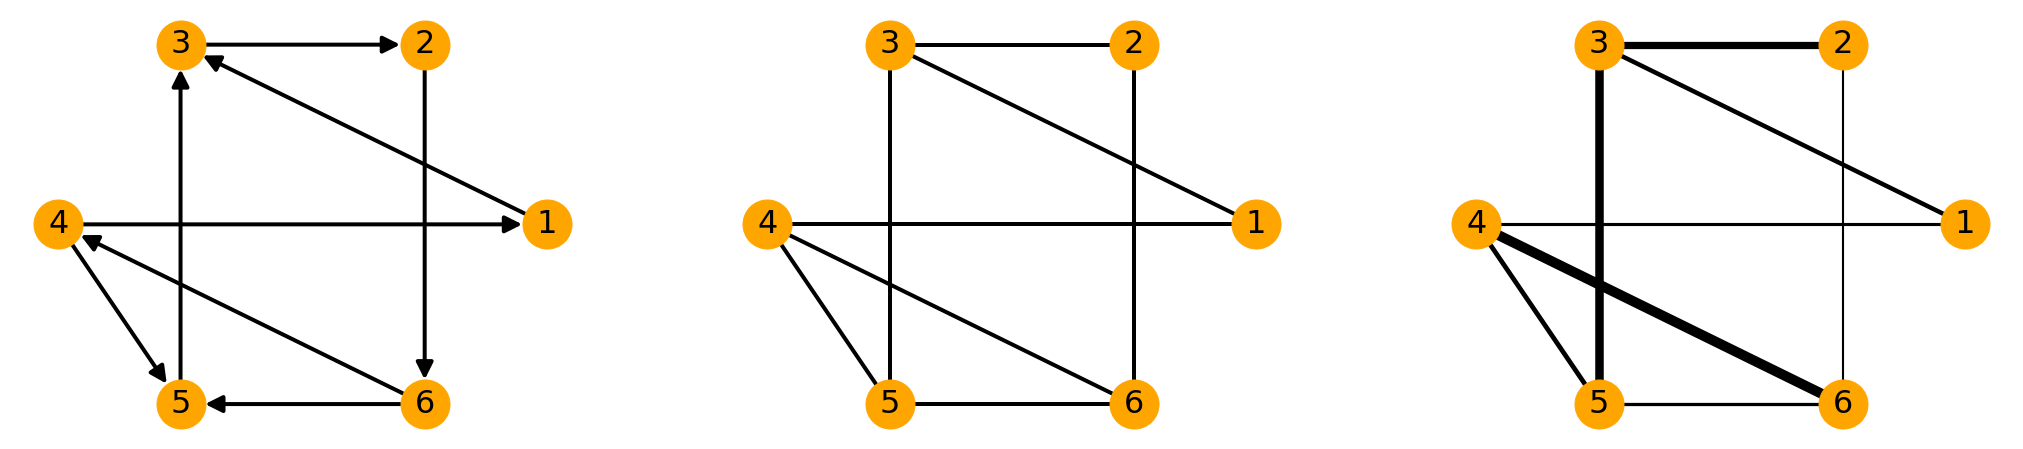

In [75]:
D= nx.DiGraph()
D.add_nodes_from(['1','2','3','4','5','6'])
the_edges=[('1','3'),('4','1'),('3','2'),('2','6'),('5','3'),('4','5'),('6','4'),('6','5')]
D.add_edges_from(the_edges)
Adj_D=nx.adjacency_matrix(D)
print(bmatrix(Adj_D.todense().T) + '\n')

G=D.to_undirected()
Adj_G=nx.adjacency_matrix(G)
print(bmatrix(Adj_G.todense().T) + '\n')

Gw=nx.Graph()
the_w_edges=[('1','3',4.5),('4','1',3.1),('3','2',7.25),('2','6',2.1),('5','3',8.5),('4','5',4.75),('6','4',10.1),('6','5',3.25)]
Gw.add_nodes_from(['1','2','3','4','5','6'])
Gw.add_weighted_edges_from(the_w_edges)
edgelist=Gw.edges
weights=[ Gw[u][v]['weight'] for u,v in Gw.edges]
#print(weights)
Adj_Gw=nx.adjacency_matrix(Gw)
print(bmatrix(Adj_Gw.todense().T) + '\n')

fig, axs = plt.subplots(1,3,figsize=(36,8))
pos=nx.circular_layout(Gw)
#fig.suptitle('Undirected graph ${\cal G}$ and $L({\cal G})$')
nx.draw_circular(D,node_size=2400, node_color='orange', width=4, with_labels=True,font_size =32,arrowsize=35, ax=axs[0])
nx.draw_circular(G,node_size=2400, node_color='orange', width=4, with_labels=True,font_size =32,ax=axs[1])
nx.draw_circular(Gw,node_size=2400, node_color='orange', width=weights, with_labels=True,font_size =32, ax=axs[2])
